In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [50]:
data = pd.read_csv('./heart.csv')

In [51]:
data.isnull().values.any()

False

In [52]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
def normalize_data(dataframe: pd.DataFrame):
    """
    Normalizes numerical columns in the DataFrame using min-max scaling.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to normalize.

    Returns:
    - pd.DataFrame: A new DataFrame with normalized numerical columns.
    """
    df_normalized = dataframe.copy()
    numeric_columns = df_normalized.select_dtypes(
        include=['float64', 'int64']).columns

    for col in numeric_columns:
        min_col = df_normalized[col].min()
        max_col = df_normalized[col].max()
        df_normalized[col] = (df_normalized[col] -
                              min_col) / (max_col - min_col)

    return df_normalized

In [54]:
data = normalize_data(data)

In [55]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [58]:
y_test_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Test Accuracy:",
      accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Logistic Regression Test Accuracy: 0.7868852459016393
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77        30
         1.0       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# Neural Net

Training Neural Network...
Epoch 1/250 - train loss: 0.7115 - val loss: 0.6829
Epoch 2/250 - train loss: 0.6827 - val loss: 0.6558
Epoch 3/250 - train loss: 0.6586 - val loss: 0.6252
Epoch 4/250 - train loss: 0.6325 - val loss: 0.5873
Epoch 5/250 - train loss: 0.6004 - val loss: 0.5426
Epoch 6/250 - train loss: 0.5628 - val loss: 0.4922
Epoch 7/250 - train loss: 0.5207 - val loss: 0.4402
Epoch 8/250 - train loss: 0.4774 - val loss: 0.3932
Epoch 9/250 - train loss: 0.4374 - val loss: 0.3559
Epoch 10/250 - train loss: 0.4046 - val loss: 0.3300
Epoch 11/250 - train loss: 0.3802 - val loss: 0.3140
Epoch 12/250 - train loss: 0.3636 - val loss: 0.3045
Epoch 13/250 - train loss: 0.3533 - val loss: 0.2977
Epoch 14/250 - train loss: 0.3476 - val loss: 0.2914
Epoch 15/250 - train loss: 0.3445 - val loss: 0.2841
Epoch 16/250 - train loss: 0.3421 - val loss: 0.2768
Epoch 17/250 - train loss: 0.3389 - val loss: 0.2690
Epoch 18/250 - train loss: 0.3333 - val loss: 0.2609
Epoch 19/250 - train loss: 0

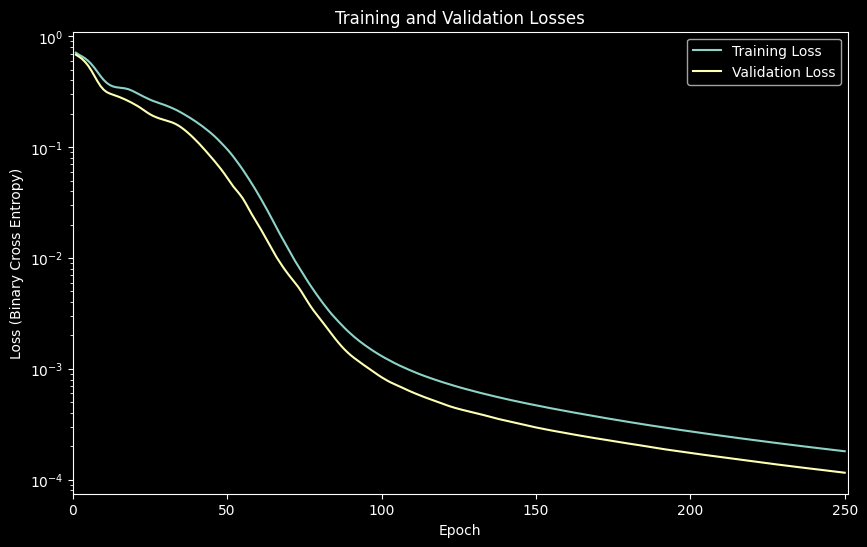

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('./heart.csv')

# Normalizing numerical columns using Min-Max scaling


def normalize_data(dataframe: pd.DataFrame):
    df_normalized = dataframe.copy()
    numeric_columns = df_normalized.select_dtypes(
        include=['float64', 'int64']).columns

    for col in numeric_columns:
        min_col = df_normalized[col].min()
        max_col = df_normalized[col].max()
        df_normalized[col] = (df_normalized[col] -
                              min_col) / (max_col - min_col)

    return df_normalized


# Normalize data
data = normalize_data(data)

# Splitting features and target
X = data.drop('target', axis=1)
y = data['target']

# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define Neural Network with sigmoid activation at the output


class NeuralNet(torch.nn.Module):
    def __init__(self, num_input_features, hidden_neurons=32):
        super(NeuralNet, self).__init__()
        self.first_layer = torch.nn.Linear(num_input_features, hidden_neurons)
        self.relu = torch.nn.ReLU()
        self.second_layer = torch.nn.Linear(hidden_neurons, hidden_neurons)
        self.third_layer = torch.nn.Linear(hidden_neurons, 1)
        self.sigmoid = torch.nn.Sigmoid()  # Output should be between 0 and 1

    def forward(self, x):
        x = self.first_layer(x)
        x = self.relu(x)
        x = self.second_layer(x)
        x = self.relu(x)
        x = self.third_layer(x)
        x = self.sigmoid(x)  # Apply sigmoid to ensure output is in [0, 1]
        return x

# Function to train neural network


def train_neural_network(model, X_train, y_train, X_val, y_val, num_epochs=250, learning_rate=0.01, verbose=True):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()
    best_model_wts = model.state_dict()
    best_loss = float('inf')
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_pred = model(X_val)
            val_loss = criterion(val_pred, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if val_loss.item() < best_loss:
            best_loss = val_loss.item()
            best_model_wts = model.state_dict()

        if verbose:
            print(
                f'Epoch {epoch+1}/{num_epochs} - train loss: {loss.item():.4f} - val loss: {val_loss.item():.4f}')

    model.load_state_dict(best_model_wts)

    if verbose:
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(train_losses) + 1),
                 train_losses, label='Training Loss')
        plt.plot(range(1, len(val_losses) + 1),
                 val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.xlim(0, len(train_losses) + 1)
        plt.ylabel('Loss (Binary Cross Entropy)')
        plt.yscale('log')
        plt.title('Training and Validation Losses')
        plt.legend()
        plt.show()

    return model


# Splitting validation data from training data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

# Scaling the validation set
X_val_scaled = scaler.transform(X_val)

# Convert validation data to tensors
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

# Initialize and train model
model = NeuralNet(X_train_tensor.shape[1], hidden_neurons=32)
print("Training Neural Network...")
best_model = train_neural_network(
    model, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor,
    num_epochs=250,
    learning_rate=0.01,
    verbose=True,
)

In [71]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred >= 0.5).float()
    test_accuracy = (y_test_pred_class == y_test_tensor).float().mean()
    print(f'Neural Network Test Accuracy: {test_accuracy.item():.4f}')

    # For classification report
    y_test_pred_class_np = y_test_pred_class.cpu().numpy()
    y_test_tensor_np = y_test_tensor.cpu().numpy()
    print(classification_report(y_test_tensor_np, y_test_pred_class_np))

Neural Network Test Accuracy: 0.8197
              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78        27
         1.0       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

